<a href="https://colab.research.google.com/github/ckstrouse/CA03-Decision-Tree-modeling/blob/main/CA03_NB_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree Algorithm

Goal: to build and evaluate a Decision Tree classification model to predict whether an individual earns more than $50K per year based on demographic and socioeconomic features. The model will be trained, evaluated using standard performance metrics, and optimized through systematic hyperparameter tuning to identify the best performing tree based

In [37]:
from IPython.display import Image, display

display(Image(url="https://raw.githubusercontent.com/jaschichi/LMU_ML_26_CA/main/CA03_Decision_Tree.png"))


The diagram below outlines the overall workflow of the Decision Tree project, showing the sequence from data loading and quality analysis through model training, evaluation, hyperparameter selection, retraining, and final prediction.

In [38]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [39]:

df = pd.read_csv("https://raw.githubusercontent.com/ArinB/MSBA-CA-03-Decision-Trees/refs/heads/master/census_data.csv")

loading the data

In [40]:

print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


taking a look at the first rows

In [41]:

print(df.shape)

(48842, 11)


 printing the DataFrame's shape

# Exploratory Data Analysis (EDA)

In [42]:

print("Columns:")
print(df.columns.tolist())

Columns:
['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin', 'flag', 'y']


The dataset contains nine categorical (binned) predictor variables along with a predefined train/test split column (flag) and a binary target variable (y) indicating whether income is greater than 50K

In [43]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [44]:
df.describe(include="all")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [45]:
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [46]:
print("\nTotal missing values in dataset:", missing_values.sum())


Total missing values in dataset: 0


In [47]:

target_counts = df['y'].value_counts()

print("Target variable distribution:")
print(target_counts)


print("\nTarget variable percentage:")
print(target_counts / len(df) * 100)

Target variable distribution:
y
0    37155
1    11687
Name: count, dtype: int64

Target variable percentage:
y
0    76.071823
1    23.928177
Name: count, dtype: float64


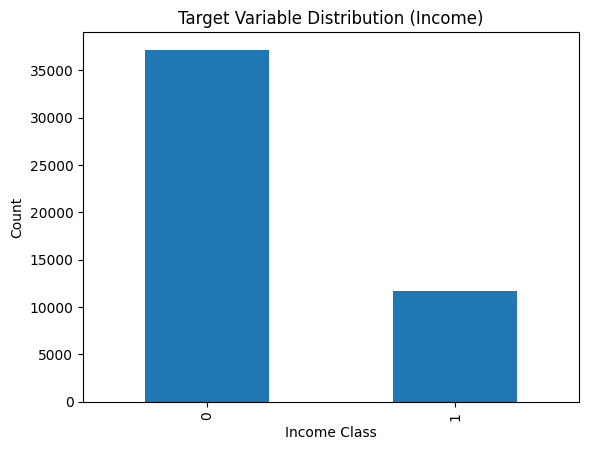

In [48]:
plt.figure()
target_counts.plot(kind='bar')
plt.title("Target Variable Distribution (Income)")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()

In [49]:
print("Train/Test split distribution:")
print(df['flag'].value_counts())

Train/Test split distribution:
flag
train    32561
test     16281
Name: count, dtype: int64


### Data Quality Report

- No missing values were found in the dataset.
- All variables are categorical or binned, which is suitable for Decision Tree modeling.
- The target variable shows class imbalance, which is expected for income classification problems.
- The dataset includes a predefined training and testing split, which was preserved for modeling.


# STEP 5 – Create Training and Testing Datasets

In [50]:
X = df.drop(columns=["y"])
y = df["y"]
train_mask = X["flag"].str.lower().eq("train")
test_mask  = X["flag"].str.lower().eq("test")
X = X.drop(columns=["flag"])
X_train, y_train = X.loc[train_mask], y.loc[train_mask]
X_test,  y_test  = X.loc[test_mask],  y.loc[test_mask]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)
print("\nTrain class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))

X_train: (32561, 9) y_train: (32561,)
X_test : (16281, 9) y_test : (16281,)

Train class distribution:
 y
0    0.75919
1    0.24081
Name: proportion, dtype: float64

Test class distribution:
 y
0    0.763774
1    0.236226
Name: proportion, dtype: float64


split the cleaned dataset into training and testing sets using the predefined flag column, removed the target and split indicator from the features, and confirmed the data sizes and class balance are correct before modeling.

# STEP 6 – Build Decision Tree Classifier


In [57]:
cat_cols = X_train.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

dt_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", DecisionTreeClassifier(random_state=42))
])


dt_model.fit(X_train, y_train)

print("Decision Tree trained successfully")



Decision Tree trained successfully


built a reproducible Decision Tree model using a fixed random state and trained it through a pipeline that encodes categorical features before fitting on the training data.

# STEP 7 – Model Performance Evaluation

In [58]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"\nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[11486   949]
 [ 1716  2130]]

TN: 11486, FP: 949, FN: 1716, TP: 2130

Model Performance Metrics:
Accuracy : 0.8363
Precision: 0.6918
Recall   : 0.5538
F1 Score : 0.6152

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



trained a reproducible Decision Tree model using encoded categorical features and are now evaluating its performance on the test dataset using standard classification metrics.

# STEP 8 – Hyperparameter Tuning

In [61]:
def eval_one_setting(preprocess, X_train, y_train, X_test, y_test, **tree_params):
    """
    Train one DecisionTree model (with preprocessing) using tree_params,
    return metrics as a dict (one row for your table).
    """
    model = Pipeline(steps=[
        ("prep", preprocess),
        ("clf", DecisionTreeClassifier(random_state=42, **tree_params))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1":        f1_score(y_test, y_pred),
    }


Helper function to train and score each hyperparameter configuration in a consistent pipeline.

RUN 1  Split Criterion

In [60]:
run1_results = []
for crit in ["gini", "entropy"]:
    metrics = eval_one_setting(preprocess, X_train, y_train, X_test, y_test, criterion=crit)
    run1_results.append({"Split Criteria": crit, **metrics})

run1_df = pd.DataFrame(run1_results).sort_values("Accuracy", ascending=False)
display(run1_df)

best_criterion = run1_df.iloc[0]["Split Criteria"]
print("Best criterion:", best_criterion)


,Split Criteria,Accuracy,Recall,Precision,F1
0,gini,0.836312,0.553822,0.691783,0.615162
1,entropy,0.834715,0.554082,0.685871,0.612973


Best criterion: gini


Both methods performed very similarly, but Gini had a slightly higher accuracy, so we chose it moving forward.

RUN 2  Minimum Samples Leaf

In [62]:
min_leaf_values = [5,10,15,20,25,30,35,40]

run2_results = []
for leaf in min_leaf_values:
    metrics = eval_one_setting(
        preprocess, X_train, y_train, X_test, y_test,
        criterion=best_criterion,
        min_samples_leaf=leaf
    )
    run2_results.append({"Min Samples Leaf": leaf, **metrics})

run2_df = pd.DataFrame(run2_results).sort_values("Accuracy", ascending=False)
display(run2_df)

best_min_leaf = int(run2_df.iloc[0]["Min Samples Leaf"])
print("Best min_samples_leaf:", best_min_leaf)


,Min Samples Leaf,Accuracy,Recall,Precision,F1
3,20,0.844051,0.565523,0.714755,0.631441
4,25,0.843314,0.566303,0.711532,0.630665
6,35,0.843069,0.559802,0.714096,0.627605
7,40,0.842454,0.556942,0.713287,0.625493
5,30,0.842270,0.557202,0.712434,0.625328
2,15,0.841963,0.560322,0.709582,0.626180
1,10,0.839936,0.561102,0.701560,0.623519
0,5,0.838523,0.557722,0.698015,0.620032


Best min_samples_leaf: 20


The model performs best when the minimum samples per leaf is 20, so we will use 20 for the next run.

RUN 3  Maximum Features

In [63]:
max_feat_values = [None, "sqrt", 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

run3_results = []
for mf in max_feat_values:
    metrics = eval_one_setting(
        preprocess, X_train, y_train, X_test, y_test,
        criterion=best_criterion,
        min_samples_leaf=best_min_leaf,
        max_features=mf
    )
    run3_results.append({"Max Features": mf, **metrics})

run3_df = pd.DataFrame(run3_results).sort_values("Accuracy", ascending=False)
display(run3_df)

best_max_features = run3_df.iloc[0]["Max Features"]
print("Best max_features:", best_max_features)


,Max Features,Accuracy,Recall,Precision,F1
7,0.8,0.845341,0.568123,0.718277,0.634437
4,0.5,0.845280,0.567603,0.718328,0.634132
0,None,0.844051,0.565523,0.714755,0.631441
6,0.7,0.843990,0.567863,0.713259,0.632310
5,0.6,0.842024,0.562923,0.708442,0.627354
3,0.4,0.838523,0.560322,0.696735,0.621127
2,0.3,0.837725,0.592824,0.679380,0.633157
1,sqrt,0.834777,0.566563,0.680512,0.618331


Best max_features: 0.8


model performs best when max_features is set to 0.8, so 0.8 is selected for the next run.

RUN 4  Maximum Depth

In [64]:
depth_values = [2,4,6,8,10,12,14,16]

run4_results = []
for d in depth_values:
    metrics = eval_one_setting(
        preprocess, X_train, y_train, X_test, y_test,
        criterion=best_criterion,
        min_samples_leaf=best_min_leaf,
        max_features=best_max_features,
        max_depth=d
    )
    run4_results.append({"Max Depth": d, **metrics})

run4_df = pd.DataFrame(run4_results).sort_values("Accuracy", ascending=False)
display(run4_df)

best_max_depth = int(run4_df.iloc[0]["Max Depth"])
print("Best max_depth:", best_max_depth)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Max Depth,Accuracy,Recall,Precision,F1
4,10,0.844113,0.553562,0.721695,0.626545
5,12,0.843744,0.569423,0.711501,0.632582
7,16,0.843683,0.559542,0.716617,0.628413
3,8,0.843437,0.560842,0.714949,0.628588
6,14,0.843437,0.570203,0.709938,0.632444
2,6,0.840366,0.595684,0.686957,0.638073
1,4,0.830723,0.459178,0.723178,0.561705
0,2,0.763774,0.000000,0.000000,0.000000


Best max_depth: 10


model achieves the highest accuracy at a depth of 10, so 10 is selected as the optimal maximum depth.

#*Final* Best Model

In [65]:
best_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", DecisionTreeClassifier(
        criterion=best_criterion,
        min_samples_leaf=best_min_leaf,
        max_features=best_max_features,
        max_depth=best_max_depth,
        random_state=42
    ))
])

best_model.fit(X_train, y_train)

print("\nFinal Best Model Trained.")



Final Best Model Trained.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print("Final Best Hyperparameters:")
print(" criterion       =", best_criterion)
print(" min_samples_leaf=", best_min_leaf)
print(" max_features    =", best_max_features)
print(" max_depth       =", best_max_depth)

print("\nConfusion Matrix:")
print(cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

print("\nFinal Best Model Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1       :", f1_score(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


The model is rebuilt using the optimal hyperparameters from the previous runs, and its final performance metrics are calculated on the test set.

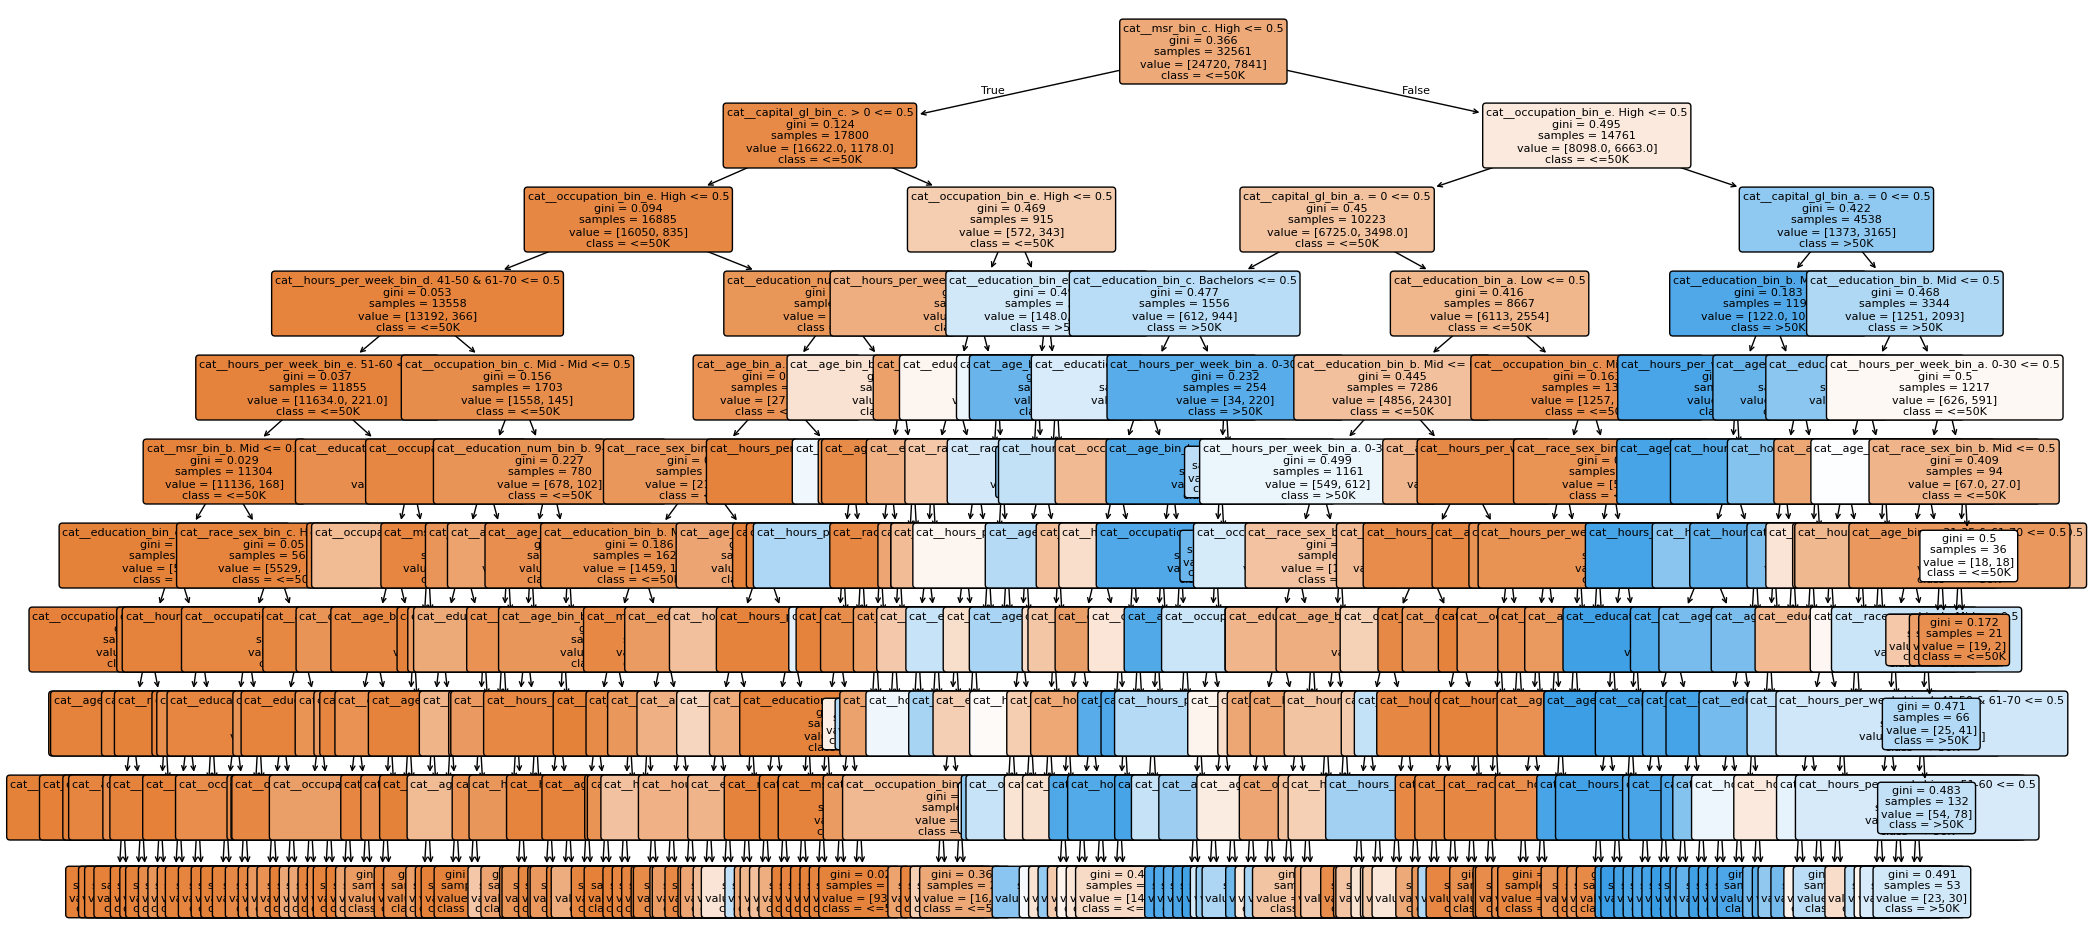

In [73]:
from sklearn.tree import plot_tree

clf = best_model.named_steps["clf"]
feature_names = best_model.named_steps["prep"].get_feature_names_out()

plt.figure(figsize=(24,12))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["<=50K", ">50K"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()


Although the fully expanded tree illustrates the model’s complete structure, its complexity reinforces the need to rely on the tuned best-performing model, which balances depth and generalization to achieve stronger and more reliable predictive performance.

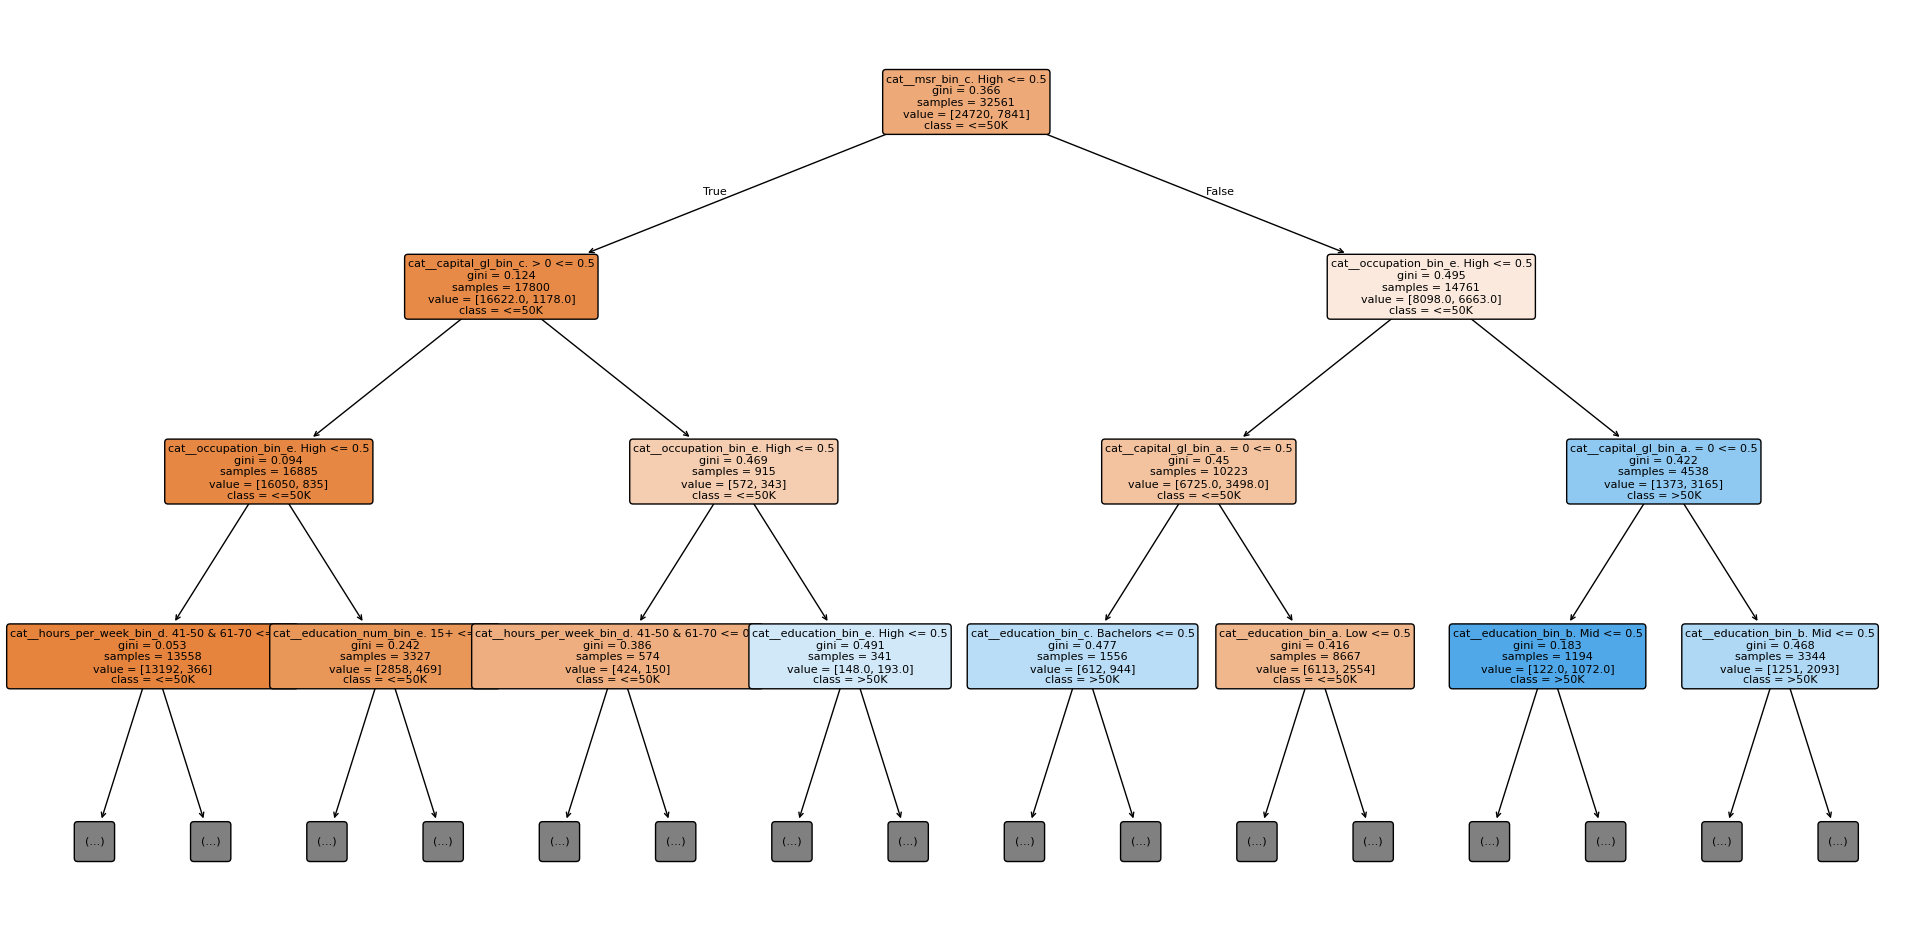

In [66]:
from sklearn.tree import plot_tree

clf = best_model.named_steps["clf"]
feature_names = best_model.named_steps["prep"].get_feature_names_out()

plt.figure(figsize=(24,12))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["<=50K", ">50K"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=8
)
plt.show()


This tree first splits on marital status/relationship (msr_bin – High), meaning relationship status is the strongest driver of income prediction in the model. From there, it mainly branches on capital gain, occupation level, and then education level and hours worked, progressively separating lower-income and higher-income groups.

In general, individuals with higher capital gains, higher education categories, and stronger occupational levels are pushed toward the >50K prediction, while those without capital gains or with lower education/occupation levels are classified as <=50K. The tree shows that income prediction is heavily influenced by a few dominant socioeconomic features rather than all variables equally.

#STEP 9 Visualization

###1. Confusion Matrix

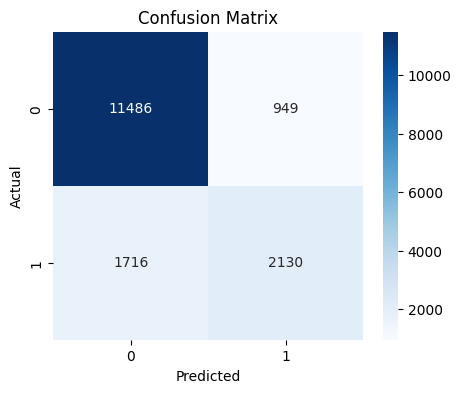

In [70]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

####Insights:
*   The model correctly classifies most low-income individuals.
*   It makes more mistakes predicting high-income individuals.
*   This suggests the model is slightly biased toward the majority class.
*   Overall performance is solid but not perfectly balanced.


###2. Feature Importance

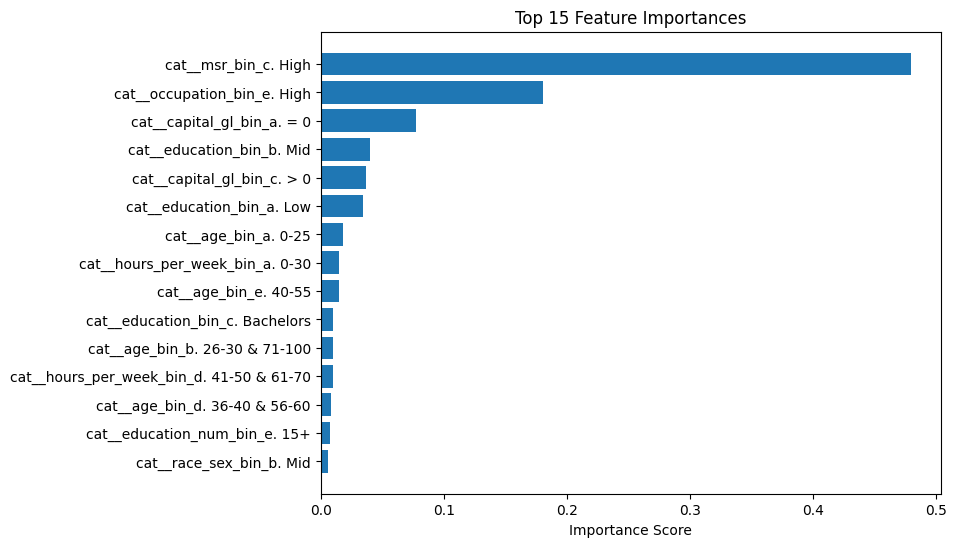

In [71]:

feature_names = best_model.named_steps["prep"].get_feature_names_out()
importances = best_model.named_steps["clf"].feature_importances_

indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

####Insights:
*   A few features have much higher importance than others.
*   The model relies heavily on key variables instead of all features equally.
*   This means some predictors strongly influence income classification.
*   Less important features contribute very little to the decision.

###3. Accuracy vs Max Depth

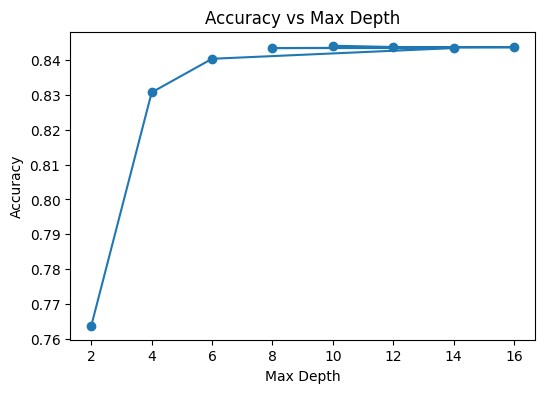

In [72]:
plt.figure(figsize=(6,4))
plt.plot(run4_df["Max Depth"], run4_df["Accuracy"], marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.show()

####Insights:
*   Accuracy improves as max depth increases at first.
*   After a certain depth, improvement slows down.
*   Very deep trees do not significantly increase accuracy.
*   This suggests a moderate depth is best to avoid overfitting.

#Prediction

In [74]:

new_person = pd.DataFrame([{
    "hours_per_week_bin":  "d. 41-50 & 61-70",
    "occupation_bin":      "b. Mid - Low",
    "msr_bin":             "c. High",
    "capital_gl_bin":      "c. > 0",
    "race_sex_bin":        "b. Mid",
    "education_num_bin":   "b. 9-12",
    "education_bin":       "c. High",
    "workclass_bin":       "b. income",
    "age_bin":             "d. 36-40 & 56-60"
}], columns=X_train.columns)

pred_class = best_model.predict(new_person)[0]
pred_label = ">50K" if pred_class == 1 else "<=50K"


proba = best_model.predict_proba(new_person)[0]
confidence = proba.max()

print("Prediction:", pred_label)
print("Probabilities [<=50K, >50K]:", proba)
print("Probability (confidence) of prediction:", confidence)


Prediction: >50K
Probabilities [<=50K, >50K]: [0.28858025 0.71141975]
Probability (confidence) of prediction: 0.7114197530864198


# Conclusion

#Why does it make sense to discretize columns for this problem?

Discretizing makes sense because income categories are usually influenced by ranges, not tiny differences. Binning also makes the model’s rules easier to interpret, and it reduces noise by grouping similar values together.

#What issues might happen if we did NOT discretize the columns?

If we didn’t discretize, the Decision Tree could create splits based on very specific numeric cutoffs, which can make the tree too complex, less interpretable, and more likely to overfit. It would also make prediction rules harder to explain to a normal person

#How long was your total run time to train the best model?

Although each individual Decision Tree trained quickly, the overall hyperparameter tuning process required training and evaluating multiple model configurations sequentially. As a result, the total runtime to determine the best-performing model was noticeably longer than training a single tree, though still computationally efficient overall

#Did you find the BEST TREE?

Through systematic hyperparameter tuning across split criterion, minimum samples per leaf, maximum features, and maximum depth, the model with gini criterion, min_samples_leaf = 20, max_features = 0.8, and max_depth = 10 achieved the highest test accuracy and balanced performance metrics
.This configuration was then retrained as the final model and evaluated on the test set.

Therefore, based on the defined evaluation metric (accuracy) and the structured tuning process, the best-performing Decision Tree within the tested parameter space was successfully identified and trained.

#observations from the visualization of the best tree

The visualization of the best Decision Tree shows that the first and most influential split is based on marital status/relationship (msr_bin – High), indicating it is the strongest predictor of income in this dataset. Subsequent splits frequently involve capital gain, occupation level, and education-related variables, suggesting that these socioeconomic factors play a major role in distinguishing between income categories. The tree structure also demonstrates that only a few dominant features drive most of the classification decisions, while many other features contribute minimally. Overall, the tree is moderately deep but remains interpretable, reflecting a balance between model complexity and generalization performance.

#Will this Tree “overfit”?

This tree is unlikely to significantly overfit because its depth and minimum leaf size were intentionally limited, preventing it from becoming fully grown. While some overfitting risk always exists with decision trees, the constraints help maintain a reasonable balance between complexity and generalization.

#Overall Conclusion

The initial Decision Tree model achieved an accuracy of 0.8363, with a precision of 0.6918, recall of 0.5538, and F1 score of 0.6152. After tuning four hyperparameters, the best performing configuration was identified as: criterion = gini, min samples leaf = 20, max features = 0.8, and max depth = 10.

Using these optimized settings, the final model improved overall accuracy to 0.8441. Precision increased to 0.7217, while recall remained relatively stable at 0.5536, resulting in an improved F1 score of 0.6265. The confusion matrix shows strong performance in predicting the majority class (≤50K) and moderate performance in predicting the higher-income class (>50K).

The tuning process demonstrates that moderate model complexity leads to better performance. Very shallow trees underfit the data, while increasing depth beyond 10 did not significantly improve accuracy. Overall, the final model represents the best balance between performance and complexity based on the evaluation criteria.